<a href="https://colab.research.google.com/github/tusharvatsa32/VisTransformers/blob/main/Code/ResNet_101_ImageNet_Final_With_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Apr 30 15:44:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    39W / 300W |  13811MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [ ]:
!pip install vision-transformer-pytorch

In [ ]:
from vision_transformer_pytorch import VisionTransformer

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"vivekaswal231","key":"ef136a38387ae54519451b63f002158e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/
!kaggle config set -n path -v /content

!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!kaggle datasets download -d ifigotin/imagenetmini-1000 -p /content/

100% 3.92G/3.92G [00:59<00:00, 51.4MB/s]
100% 3.92G/3.92G [00:59<00:00, 70.2MB/s]


In [ ]:
!unzip -q \*.zip

In [ ]:
# Importing Libraries
import torch                       # pytorch
import torch.nn as nn              # pytorch for neural network
import numpy as np                 # for algebric functions
import matplotlib.pyplot as plt    # to plot graph
import PIL


# torch vision package
import torchvision                 # for handling image & has CNN architecture
from torchvision import transforms

In [ ]:
import PIL
img_size = ((224, 224)) #For ResNet models
#img_size = ((384, 384)) # For ViT predefined weights

transforms_train = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    transforms.ToTensor(),
    transforms.RandomCrop(img_size, fill=0),
    transforms.RandomAffine(10, translate=None, scale=(0.8, 1.2), shear=None, fill=0, fillcolor=None, resample=None),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transforms_val = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1201: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [ ]:
trainset = torchvision.datasets.ImageFolder(root='imagenet-mini/train', transform=transforms_train) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=8, pin_memory=True)

testset = torchvision.datasets.ImageFolder(root='imagenet-mini/val', transform=transforms_val)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False, num_workers=8, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
len(trainset.classes)

1000

In [ ]:
!pip install vit-pytorch

In [ ]:
#from vision_transformer_pytorch import VisionTransformer
from vit_pytorch import ViT

In [ ]:
numEpochs = 100
in_features = 3 # RGB channels

learningRate = 0.1
weightDecay = 5e-5

num_classes = len(trainset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ViT(
    image_size = 224,
    patch_size = 16,
    num_classes = 1000,
    dim = 512,
    depth = 6,
    heads = 8,
    mlp_dim = 2048,
    dropout = 0.25,
    emb_dropout = 0.1
)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=weightDecay, momentum=0.9, nesterov=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.3, patience=5, threshold=0.002, verbose=True)

In [ ]:
#class labels [there are 10 lables]
#this is the order of lable of this dataset
classes = trainset.classes
print(classes)

['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750'

In [ ]:
numEpochs = 100
in_features = 3 # RGB channels

learningRate = 0.03
weightDecay = 5e-5

num_classes = len(trainset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = VisionTransformer.from_pretrained('ViT-B_16', num_classes=10)

#model = VisionTransformer.from_name('ViT-B_16', num_classes=10, image_size=(224, 224))


model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=weightDecay, momentum=0.9, nesterov=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.3, patience=3, threshold=0.002, verbose=True)

Downloading: "https://github.com/tczhangzhi/VisionTransformer-PyTorch/releases/download/1.0.1/ViT-B_16_imagenet21k_imagenet2012.pth" to /root/.cache/torch/hub/checkpoints/ViT-B_16_imagenet21k_imagenet2012.pth



Loaded pretrained weights for ViT-B_16


In [ ]:
model

In [ ]:
# model = models.resnet101(pretrained=True)

In [ ]:
i = 0
for name, layer in model.named_modules():
  #if isinstance(layer, torch.nn.Conv2d) or isinstance(layer, torch.nn.BatchNorm2d) or isinstance(layer, torch.nn.ReLU) or isinstance(layer, torch.nn.MaxPool2d):
    print(name, layer)
    i+=1
    print(i)

In [ ]:
for param in model.parameters():
  print(param.requires_grad)

In [ ]:
# for param in model_ft.parameters():
#     param.requires_grad = False

In [ ]:
model = models.resnet101(pretrained=True)

# for param in model_ft.parameters():
#     param.requires_grad = False

  
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

num_classes = len(trainset.classes)

model.fc = nn.Linear(num_ftrs, num_classes)

learningRate = 0.1
weightDecay = 5e-5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=weightDecay, momentum=0.9, nesterov=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, threshold=0.002, verbose=True)

In [ ]:
i = 0
for param in model.parameters():
  if i < 304:
    param.requires_grad = False
  else:
    break
  #print(param.requires_grad)
  i+=1
  #print(i)

In [ ]:
model.fc = nn.Sequential(
    nn.Dropout(0.35),
    nn.Linear(in_features=2048, out_features=1000, bias=True)
)
model = model.to(device)

In [ ]:
model

In [ ]:
my_acc = []
my_loss = []

In [ ]:
# Train!
numEpochs = 100
for epoch in range(numEpochs):
    
    # Train
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    correct = 0

    for batch_num, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        
        x, y = x.to(device), y.to(device)

        outputs = model(x)

        correct += (torch.argmax(outputs, axis=1) == y).sum().item()

        loss = criterion(outputs, y.long())
        loss.backward()
        optimizer.step()

        del(outputs)

        train_loss += loss.item()

        if batch_num % 100 == 0:
            print('Epoch: {}\tBatch: {}\tAvg-Loss: {:.4f}'.format(epoch, batch_num+1, train_loss/(batch_num+1)))

    train_accuracy = correct / len(trainset)

    # Validate
    model.eval()
    num_correct = 0
    for batch_num1, (x, y) in enumerate(testloader):
        x, y = x.to(device), y.to(device)
        outputs = model(x)

        num_correct += (torch.argmax(outputs, axis=1) == y).sum().item()

    val_accuracy = num_correct / len(testset)
    my_acc.append(val_accuracy)
    my_loss.append(train_loss/(batch_num+1))
    print('Epoch: {}\t Training Accuracy: {:.4f}\t Validation Accuracy: {:.4f}\t Avg-Loss: {:.4f}'.format(epoch, train_accuracy*100, val_accuracy * 100, train_loss/(batch_num+1)))
    scheduler.step(val_accuracy)

    #torch.save(network.state_dict(),'/content/drive/MyDrive/DL_CMU/HW2_P2/ResNet_Plateau_d3/Net_'+str(epoch)+'_'+str(val_accuracy)+'_checkpoint.t7')

In [ ]:
np.save('ResNet-101_Acc_ImageNet-1K_Dataset', my_acc)
np.save('ResNet-101_Loss_ImageNet-1K_Dataset', my_loss)

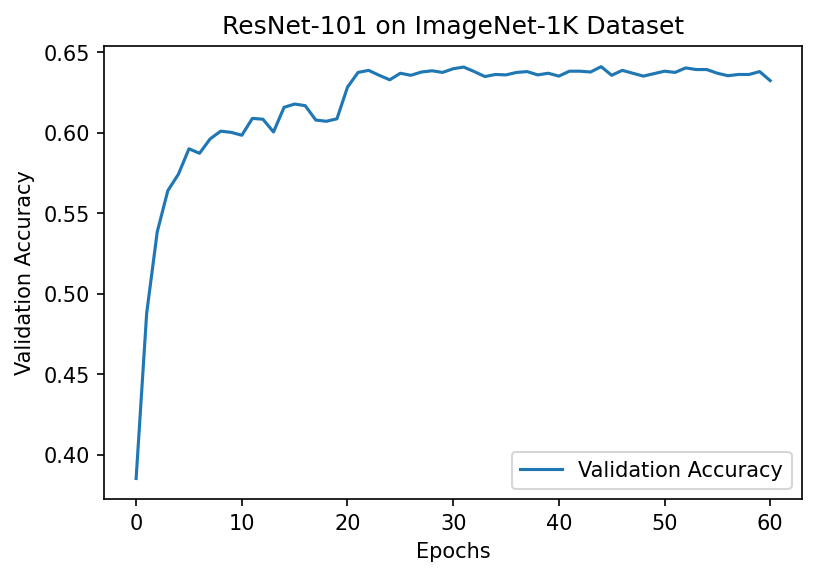

In [ ]:
plt.figure(figsize=(6,4), dpi = 150)
plt.plot(my_acc, label = 'Validation Accuracy')
#plt.plot(my_loss, label = 'Validation Loss')
plt.legend()
plt.title('ResNet-101 on ImageNet-1K Dataset')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

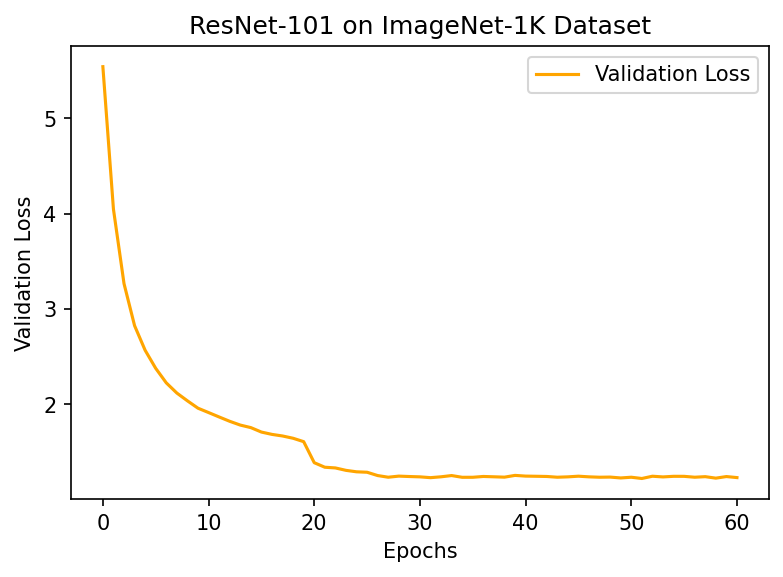

In [ ]:
plt.figure(figsize=(6,4), dpi = 150)
#plt.plot(my_acc, label = 'Validation Accuracy')
plt.plot(my_loss, label = 'Validation Loss', color = 'orange')
plt.legend()
plt.title('ResNet-101 on ImageNet-1K Dataset')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()